In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys

import torch
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

from tqdm import tqdm

In [2]:
!cp "/content/drive/MyDrive/KLEEMANN/2_year_samples.xlsx" "/content"

In [3]:
class KleemannDataset(Dataset):
    def __init__(self, pressure_ts, seq_length=15, mean=0, std=1.0):
        self.data = torch.tensor(pressure_ts, dtype=torch.float)        
        self.data = (self.data - mean) / std
        self.seq_length = seq_length
        
    def __len__(self):
        return len(self.data) - self.seq_length - 1
    
    def __getitem__(self, i):
        return self.data[i:(i + self.seq_length)].unsqueeze(0), self.data[i + self.seq_length]

In [4]:
class RegressionCNN(nn.Module):
    def __init__(self, seq_length):
        super().__init__()
        self.seq_length = seq_length
        self.conv1 = nn.Conv1d(1, 8, 5)
        self.relu1 = nn.LeakyReLU()
        self.conv2 = nn.Conv1d(8, 32, 3)
        self.relu2 = nn.LeakyReLU()
        self.conv3 = nn.Conv1d(32, 8, 3)
        self.relu3 = nn.LeakyReLU()
        self.linear = nn.Linear(in_features=56, out_features=1)

    def forward(self, x):
        x = self.relu1(self.conv1(x))
        x = self.relu2(self.conv2(x))
        x = self.relu3(self.conv3(x))
        x = x.view(-1, self.num_flat_features(x))
        y = self.linear(x)
        return y
    
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [5]:
# Define xlsx filename
filename = "/content/2_year_samples.xlsx"
# Read the .xlsx
df = pd.read_excel(filename)
# Drop columns that we don't need
df_cleaned = df.drop(df.columns[[0, 7]],axis = 1)
# Set Dataframe's dtype to float32
df_cleaned = df_cleaned.astype(np.float32)
print(df_cleaned.shape)
df_cleaned.head()

(109970, 6)


,SPEED UP,NOISE UP,PRESSURE UP,SPEED DOWN,NOISE DOWN,PRESSURE DOWN
0,0.0,51.049999,15.66,0.00,56.360001,17.17
1,0.0,51.049999,15.66,0.00,56.099998,16.68
2,0.0,51.189999,15.66,0.00,55.939999,16.68
3,0.0,52.139999,15.66,0.00,55.939999,15.29
4,0.0,52.139999,15.66,0.07,55.869999,15.29


In [6]:
feature_types = ['SPEED UP', 'NOISE UP', 'PRESSURE UP', 'SPEED DOWN', 'NOISE DOWN', 'PRESSURE DOWN']
seq_lengths = [x for x in [15]]


Training for SPEED UP with sequence length = 15



 10%|█         | 1/10 [00:02<00:23,  2.56s/it]

Train loss: 0.045111086359728866


 20%|██        | 2/10 [00:05<00:20,  2.55s/it]

Train loss: 0.01022024016354464


 30%|███       | 3/10 [00:07<00:18,  2.59s/it]

Train loss: 0.008537249700883728


 40%|████      | 4/10 [00:10<00:15,  2.57s/it]

Train loss: 0.008303082386619538


 50%|█████     | 5/10 [00:13<00:13,  2.65s/it]

Train loss: 0.008009760779161993


 60%|██████    | 6/10 [00:15<00:10,  2.61s/it]

Train loss: 0.008105997475663089


 70%|███████   | 7/10 [00:18<00:07,  2.59s/it]

Train loss: 0.007918961307118727


 80%|████████  | 8/10 [00:20<00:05,  2.57s/it]

Train loss: 0.007774633191494651


 90%|█████████ | 9/10 [00:23<00:02,  2.56s/it]

Train loss: 0.007890380818432303


100%|██████████| 10/10 [00:25<00:00,  2.58s/it]

Train loss: 0.007532945493352298



MSE loss in sample SPEED UP: 0.00016010398394428194
MSE loss out of sample SPEED UP: 0.00013271134230308235



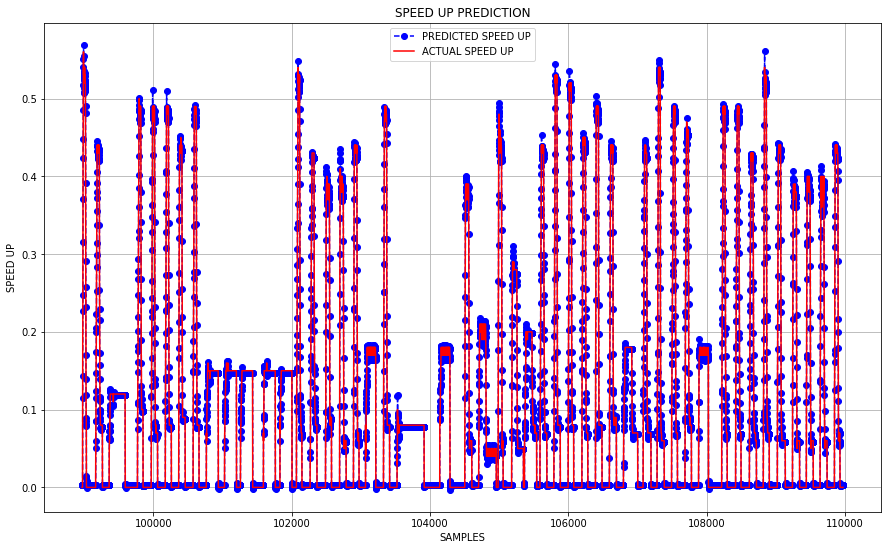


Training for NOISE UP with sequence length = 15



 10%|█         | 1/10 [00:02<00:23,  2.65s/it]

Train loss: 0.07835343762317679


 20%|██        | 2/10 [00:05<00:20,  2.59s/it]

Train loss: 0.03041974421887546


 30%|███       | 3/10 [00:08<00:20,  2.87s/it]

Train loss: 0.03027112234265714


 40%|████      | 4/10 [00:10<00:16,  2.76s/it]

Train loss: 0.030199449466027317


 50%|█████     | 5/10 [00:13<00:13,  2.70s/it]

Train loss: 0.030263903416677868


 60%|██████    | 6/10 [00:16<00:10,  2.66s/it]

Train loss: 0.03016913099290315


 70%|███████   | 7/10 [00:18<00:07,  2.63s/it]

Train loss: 0.030605237749885005


 80%|████████  | 8/10 [00:21<00:05,  2.61s/it]

Train loss: 0.030225906865308044


 90%|█████████ | 9/10 [00:23<00:02,  2.60s/it]

Train loss: 0.030127346167923025


100%|██████████| 10/10 [00:26<00:00,  2.65s/it]

Train loss: 0.030563603097379873



MSE loss in sample NOISE UP: 35.89842987060547
MSE loss out of sample NOISE UP: 39.38755416870117



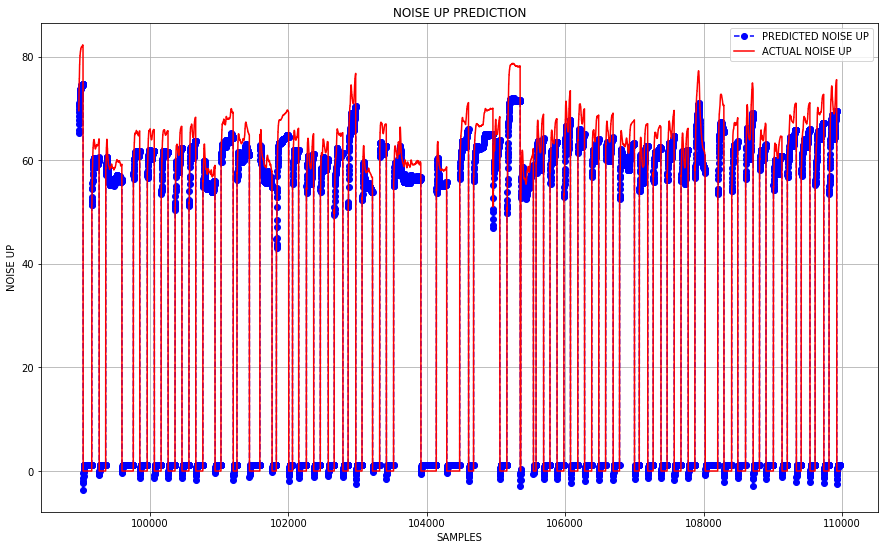


Training for PRESSURE UP with sequence length = 15



 10%|█         | 1/10 [00:02<00:23,  2.57s/it]

Train loss: 0.0891769620229235


 20%|██        | 2/10 [00:05<00:20,  2.59s/it]

Train loss: 0.031727328219952465


 30%|███       | 3/10 [00:07<00:17,  2.57s/it]

Train loss: 0.03024935044479997


 40%|████      | 4/10 [00:10<00:15,  2.60s/it]

Train loss: 0.029930575534519957


 50%|█████     | 5/10 [00:13<00:13,  2.71s/it]

Train loss: 0.0298553140942192


 60%|██████    | 6/10 [00:16<00:11,  2.87s/it]

Train loss: 0.029620105434899176


 70%|███████   | 7/10 [00:19<00:08,  2.77s/it]

Train loss: 0.02973482734350745


 80%|████████  | 8/10 [00:21<00:05,  2.70s/it]

Train loss: 0.029584560913037693


 90%|█████████ | 9/10 [00:24<00:02,  2.68s/it]

Train loss: 0.029941320344502646


100%|██████████| 10/10 [00:26<00:00,  2.67s/it]

Train loss: 0.02959595203161413



MSE loss in sample PRESSURE UP: 3.259166955947876
MSE loss out of sample PRESSURE UP: 3.7137451171875



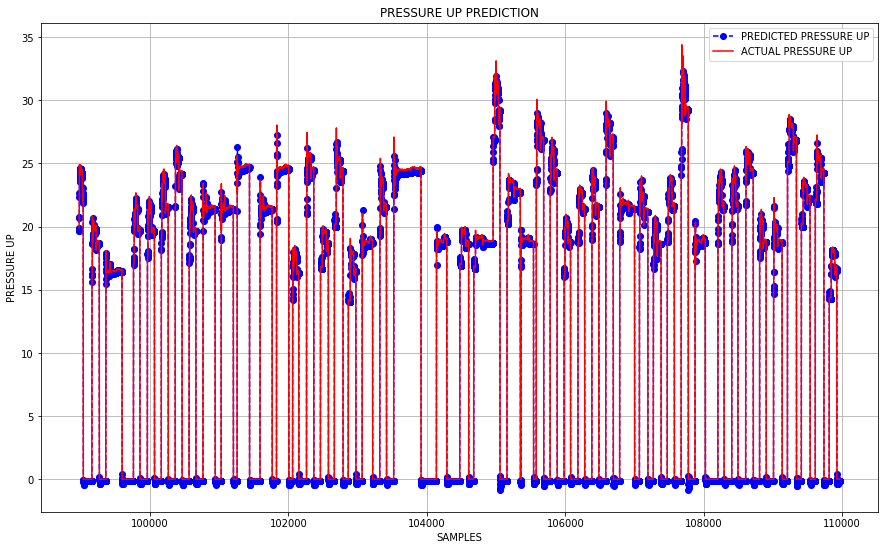


Training for SPEED DOWN with sequence length = 15



 10%|█         | 1/10 [00:02<00:23,  2.59s/it]

Train loss: 0.059761587422382016


 20%|██        | 2/10 [00:05<00:20,  2.58s/it]

Train loss: 0.010226176152377598


 30%|███       | 3/10 [00:07<00:17,  2.56s/it]

Train loss: 0.008138064909918903


 40%|████      | 4/10 [00:10<00:15,  2.56s/it]

Train loss: 0.007710531932642943


 50%|█████     | 5/10 [00:12<00:12,  2.60s/it]

Train loss: 0.007578701537267307


 60%|██████    | 6/10 [00:15<00:10,  2.59s/it]

Train loss: 0.007440812742122201


 70%|███████   | 7/10 [00:18<00:07,  2.58s/it]

Train loss: 0.007328967194708223


 80%|████████  | 8/10 [00:20<00:05,  2.58s/it]

Train loss: 0.007264433933487547


 90%|█████████ | 9/10 [00:23<00:02,  2.57s/it]

Train loss: 0.0072582584859331644


100%|██████████| 10/10 [00:25<00:00,  2.58s/it]

Train loss: 0.007147645202512508



MSE loss in sample SPEED DOWN: 0.00010866702359635383
MSE loss out of sample SPEED DOWN: 0.0001037547699525021



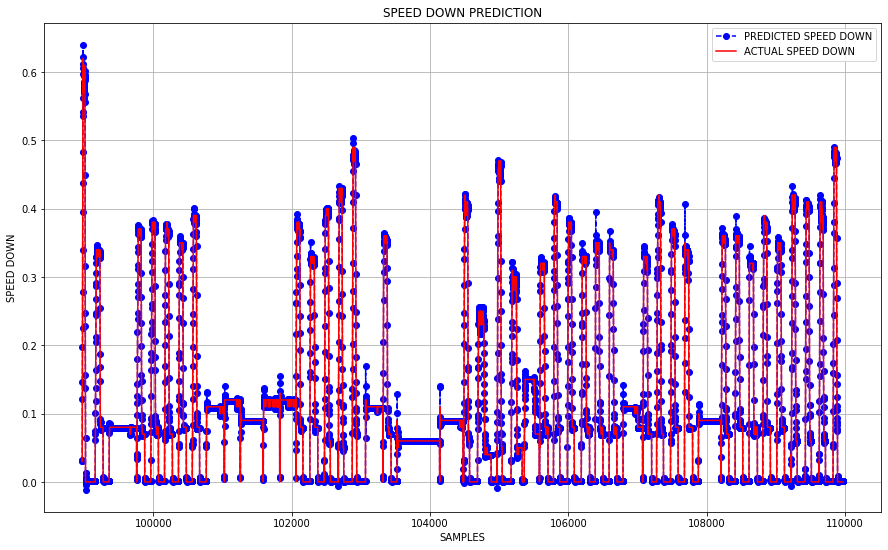


Training for NOISE DOWN with sequence length = 15



 10%|█         | 1/10 [00:02<00:22,  2.55s/it]

Train loss: 0.0784716688851418


 20%|██        | 2/10 [00:05<00:20,  2.56s/it]

Train loss: 0.029556410394359148


 30%|███       | 3/10 [00:07<00:17,  2.56s/it]

Train loss: 0.029178165920192387


 40%|████      | 4/10 [00:10<00:15,  2.57s/it]

Train loss: 0.028949797682126684


 50%|█████     | 5/10 [00:12<00:12,  2.56s/it]

Train loss: 0.028870579999500347


 60%|██████    | 6/10 [00:15<00:10,  2.60s/it]

Train loss: 0.028932204178088266


 70%|███████   | 7/10 [00:18<00:07,  2.59s/it]

Train loss: 0.029036838925879282


 80%|████████  | 8/10 [00:20<00:05,  2.59s/it]

Train loss: 0.02873222137295717


 90%|█████████ | 9/10 [00:23<00:02,  2.58s/it]

Train loss: 0.02883316614947086


100%|██████████| 10/10 [00:25<00:00,  2.58s/it]

Train loss: 0.028759415953955966



MSE loss in sample NOISE DOWN: 23.50558090209961
MSE loss out of sample NOISE DOWN: 23.825510025024414



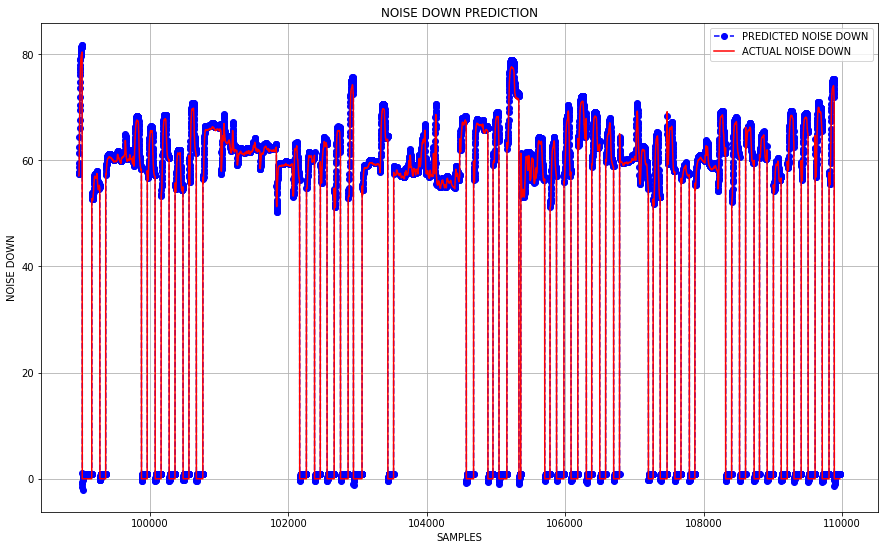


Training for PRESSURE DOWN with sequence length = 15



 10%|█         | 1/10 [00:02<00:26,  2.90s/it]

Train loss: 0.08626010298526796


 20%|██        | 2/10 [00:06<00:24,  3.04s/it]

Train loss: 0.03573062192818309


 30%|███       | 3/10 [00:08<00:19,  2.81s/it]

Train loss: 0.034037501582608425


 40%|████      | 4/10 [00:11<00:16,  2.72s/it]

Train loss: 0.033563806429308014


 50%|█████     | 5/10 [00:13<00:13,  2.66s/it]

Train loss: 0.03324002527950833


 60%|██████    | 6/10 [00:16<00:10,  2.61s/it]

Train loss: 0.03323963512594704


 70%|███████   | 7/10 [00:18<00:07,  2.63s/it]

Train loss: 0.033064353262716985


 80%|████████  | 8/10 [00:21<00:05,  2.64s/it]

Train loss: 0.03277098357667157


 90%|█████████ | 9/10 [00:24<00:02,  2.61s/it]

Train loss: 0.03274681732126283


100%|██████████| 10/10 [00:26<00:00,  2.67s/it]

Train loss: 0.03278615859485152



MSE loss in sample PRESSURE DOWN: 2.580312967300415
MSE loss out of sample PRESSURE DOWN: 2.8521668910980225



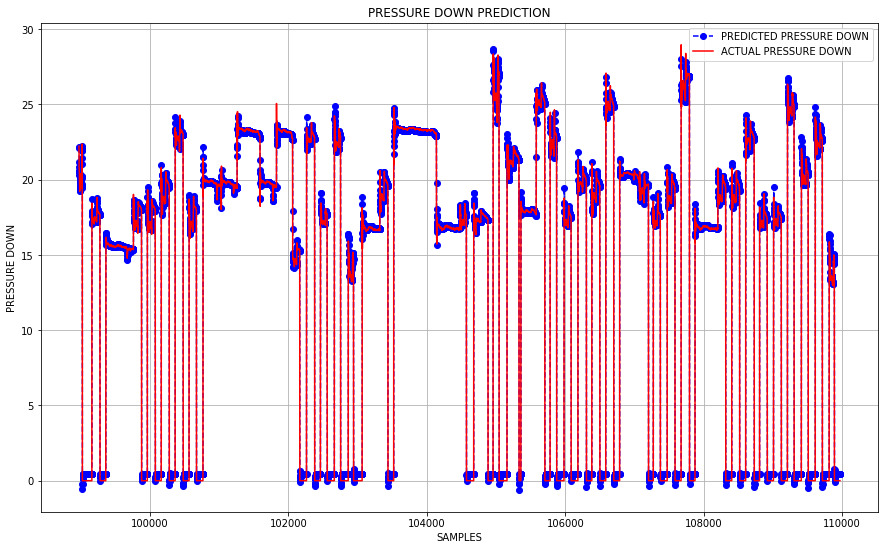

In [13]:
for feature in feature_types:
    with open(f"cnn_logs_{feature}.txt",'w',encoding = 'utf-8') as f:
        seq_losses = []
        for i, seq_len in enumerate(seq_lengths, start=1):
            # Get the feature of interest
            time_series = df_cleaned[feature]
            data = time_series.to_numpy()

            # Define the Sequence length
            seq_length = seq_len
            # Get train and test data
            train_ts = data[0:int(9 * time_series.shape[0] / 10)]            
            test_ts = data[(int(9 * time_series.shape[0] / 10) - seq_length):]

            # Get mean and std od training data
            mean = np.mean(train_ts)
            std = np.std(train_ts)

            # Get the device
            device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

            # Define the hyperparameters
            num_epochs = 10
            batch_size = 128
            ln_rate = 0.001

            # Create train and test datasets
            train_dataset = KleemannDataset(train_ts, seq_length=seq_length, mean=mean, std=std)
            test_dataset = KleemannDataset(test_ts, seq_length=seq_length, mean=mean, std=std)

            # Create dataloaders
            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
            test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
            test_loader_in_sample = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

            # Initialize the model ,place it to device and set it to train mode
            cnn_model = RegressionCNN(seq_length=seq_length)
            cnn_model.to(device)
            cnn_model.train()

            # Define loss function and optimizer 
            loss_function = nn.MSELoss()
            optimizer = torch.optim.Adam(cnn_model.parameters(), lr=ln_rate)

            print(f"\nTraining for {feature} with sequence length = {seq_length}\n")

            # Training Loop
            for epoch in tqdm(range(num_epochs), total=num_epochs):
                epoch_loss = 0
                for X, y in train_loader:
                    
                    # Place the training sample to device
                    X_dev = X.to(device)
                    y_dev = y.unsqueeze(1).to(device)
                    
                    # Get the prediction and calculate the loss
                    prediction = cnn_model(X_dev)
                    loss = loss_function(prediction, y_dev)
                    
                    # Backpropagation and weights update
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()
                    
                    # Add the loss
                    epoch_loss += loss.item()
                
                num_batches = len(train_loader)
                avg_loss = epoch_loss / num_batches
                print(f"Train loss: {avg_loss}")
            
            # Save the model
            model_path = f"cnn_{feature}_{epoch+1}.pth"
            # torch.save(cnn_model.state_dict(), model_path)

            # Calculate out of sample predictions
            outofsample_preds = torch.tensor([]).to(device)
            ground = torch.tensor([]).to(device)
            cnn_model.eval()
            with torch.inference_mode():
                for X, y in test_loader:
                    X_dev = X.to(device)
                    y_dev = y.unsqueeze(1).to(device)
                    prediction = cnn_model(X_dev)
                    y_unnorm = y_dev * std + mean
                    prediction_unnorm = prediction * std + mean
                    outofsample_preds = torch.cat((outofsample_preds, prediction_unnorm), 0)
                    ground = torch.cat((ground, y_unnorm), 0)

            # Calculate insample predictions
            insample_preds = torch.tensor([]).to(device)
            inground = torch.tensor([]).to(device)
            cnn_model.eval()
            with torch.inference_mode():
                for X, y in test_loader_in_sample:
                    X_dev = X.to(device)
                    y_dev = y.unsqueeze(1).to(device)
                    prediction = cnn_model(X_dev)
                    y_unnorm = y_dev * std + mean
                    prediction_unnorm = prediction * std + mean
                    insample_preds = torch.cat((insample_preds, prediction_unnorm), 0)
                    inground = torch.cat((inground, y_unnorm), 0)
            
            # Write losses in .txt file
            avg_loss_in = loss_function(inground, insample_preds).item()
            msg = f'\nMSE loss in sample {feature}: {str(avg_loss_in)}\n'
            # f.write(msg)
            print(f'\nMSE loss in sample {feature}: {avg_loss_in}')

            avg_loss_out = loss_function(ground, outofsample_preds).item()
            msg = f'MSE loss out of sample {feature}: {str(avg_loss_out)}\n'
            # f.write(msg)
            print(f'MSE loss out of sample {feature}: {avg_loss_out}\n')
            f.write(f"{i}: {avg_loss_out}\n")

            seq_losses.append(avg_loss_out)

            # Plot insample and out of sample predictions
            # plt.figure(figsize=(15, 9))
            # plt.grid(True)
            # plt.plot(inground.cpu(), 'r')
            # plt.plot(insample_preds.cpu(), 'b', marker='o', linestyle='dashed')
            # plt.title(f"CNN in-sample predictions for {feature}")
            # plt.legend(['training data', 'predictions'])
            # fname= f'cnn_{feature}_insample.png'
            # plt.savefig(fname)
            # plt.show()

            to_row = int(len(df_cleaned)*0.9)
            sample_range = df_cleaned[to_row:].index
            sample_range = torch.tensor(sample_range[:-1]).cpu()

            plt.figure(figsize=(15, 9))
            plt.grid(True)
            plt.plot(sample_range, outofsample_preds.cpu(), 'b', marker='o', linestyle='dashed')
            plt.plot(sample_range, ground.cpu(), 'r')
            plt.title(f"{feature} PREDICTION")
            plt.xlabel("SAMPLES")
            plt.ylabel(feature)
            plt.legend([f'PREDICTED {feature}', f'ACTUAL {feature}'])
            fname= f'cnn_{feature}_predictions.png'
            plt.savefig(fname)
            plt.show()
    
    # plt.figure(figsize=(15, 9))
    # plt.grid(True)
    # plt.plot(seq_losses)
    # plt.title(f"CNN out-of-sample loss - sequence length for {feature}")
    # plt.xlabel("Sequence Length")
    # plt.ylabel("Mean Squared Error")
    # plt.legend(['losses'])
    # fname = f'cnn_{feature}_losses_seq_lengths.png'
    # plt.savefig(fname)
    # plt.show()
